In [1]:
import pandas as pd
df=pd.read_csv('Obesity prediction.csv')
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [2]:
#Checking missing values
df.isna().sum()

Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64

In [3]:
numeric_cols=["Age","Height","Weight","FCVC","NCP","CH2O","FAF","TUE"]
categorical_cols=["Gender","family_history","FAVC","CAEC","SMOKE","SCC","CALC","MTRANS"]

In [4]:
df=pd.get_dummies(df,columns=categorical_cols,dtype=int)
df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Obesity,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight,1,...,0,0,0,0,1,0,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight,1,...,1,0,0,1,0,0,0,0,1,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight,0,...,0,0,1,0,0,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I,0,...,0,0,1,0,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II,0,...,0,0,0,1,0,0,0,0,1,0


In [5]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["Obesity"]=LE.fit_transform(df["Obesity"])
df.head()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Obesity,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,1,...,0,0,0,0,1,0,0,0,1,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,1,...,1,0,0,1,0,0,0,0,1,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,5,0,...,0,0,1,0,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,6,0,...,0,0,0,1,0,0,0,0,1,0


In [6]:
import pickle
pickle.dump(LE,open("LabelEncoder.pkl","wb"))


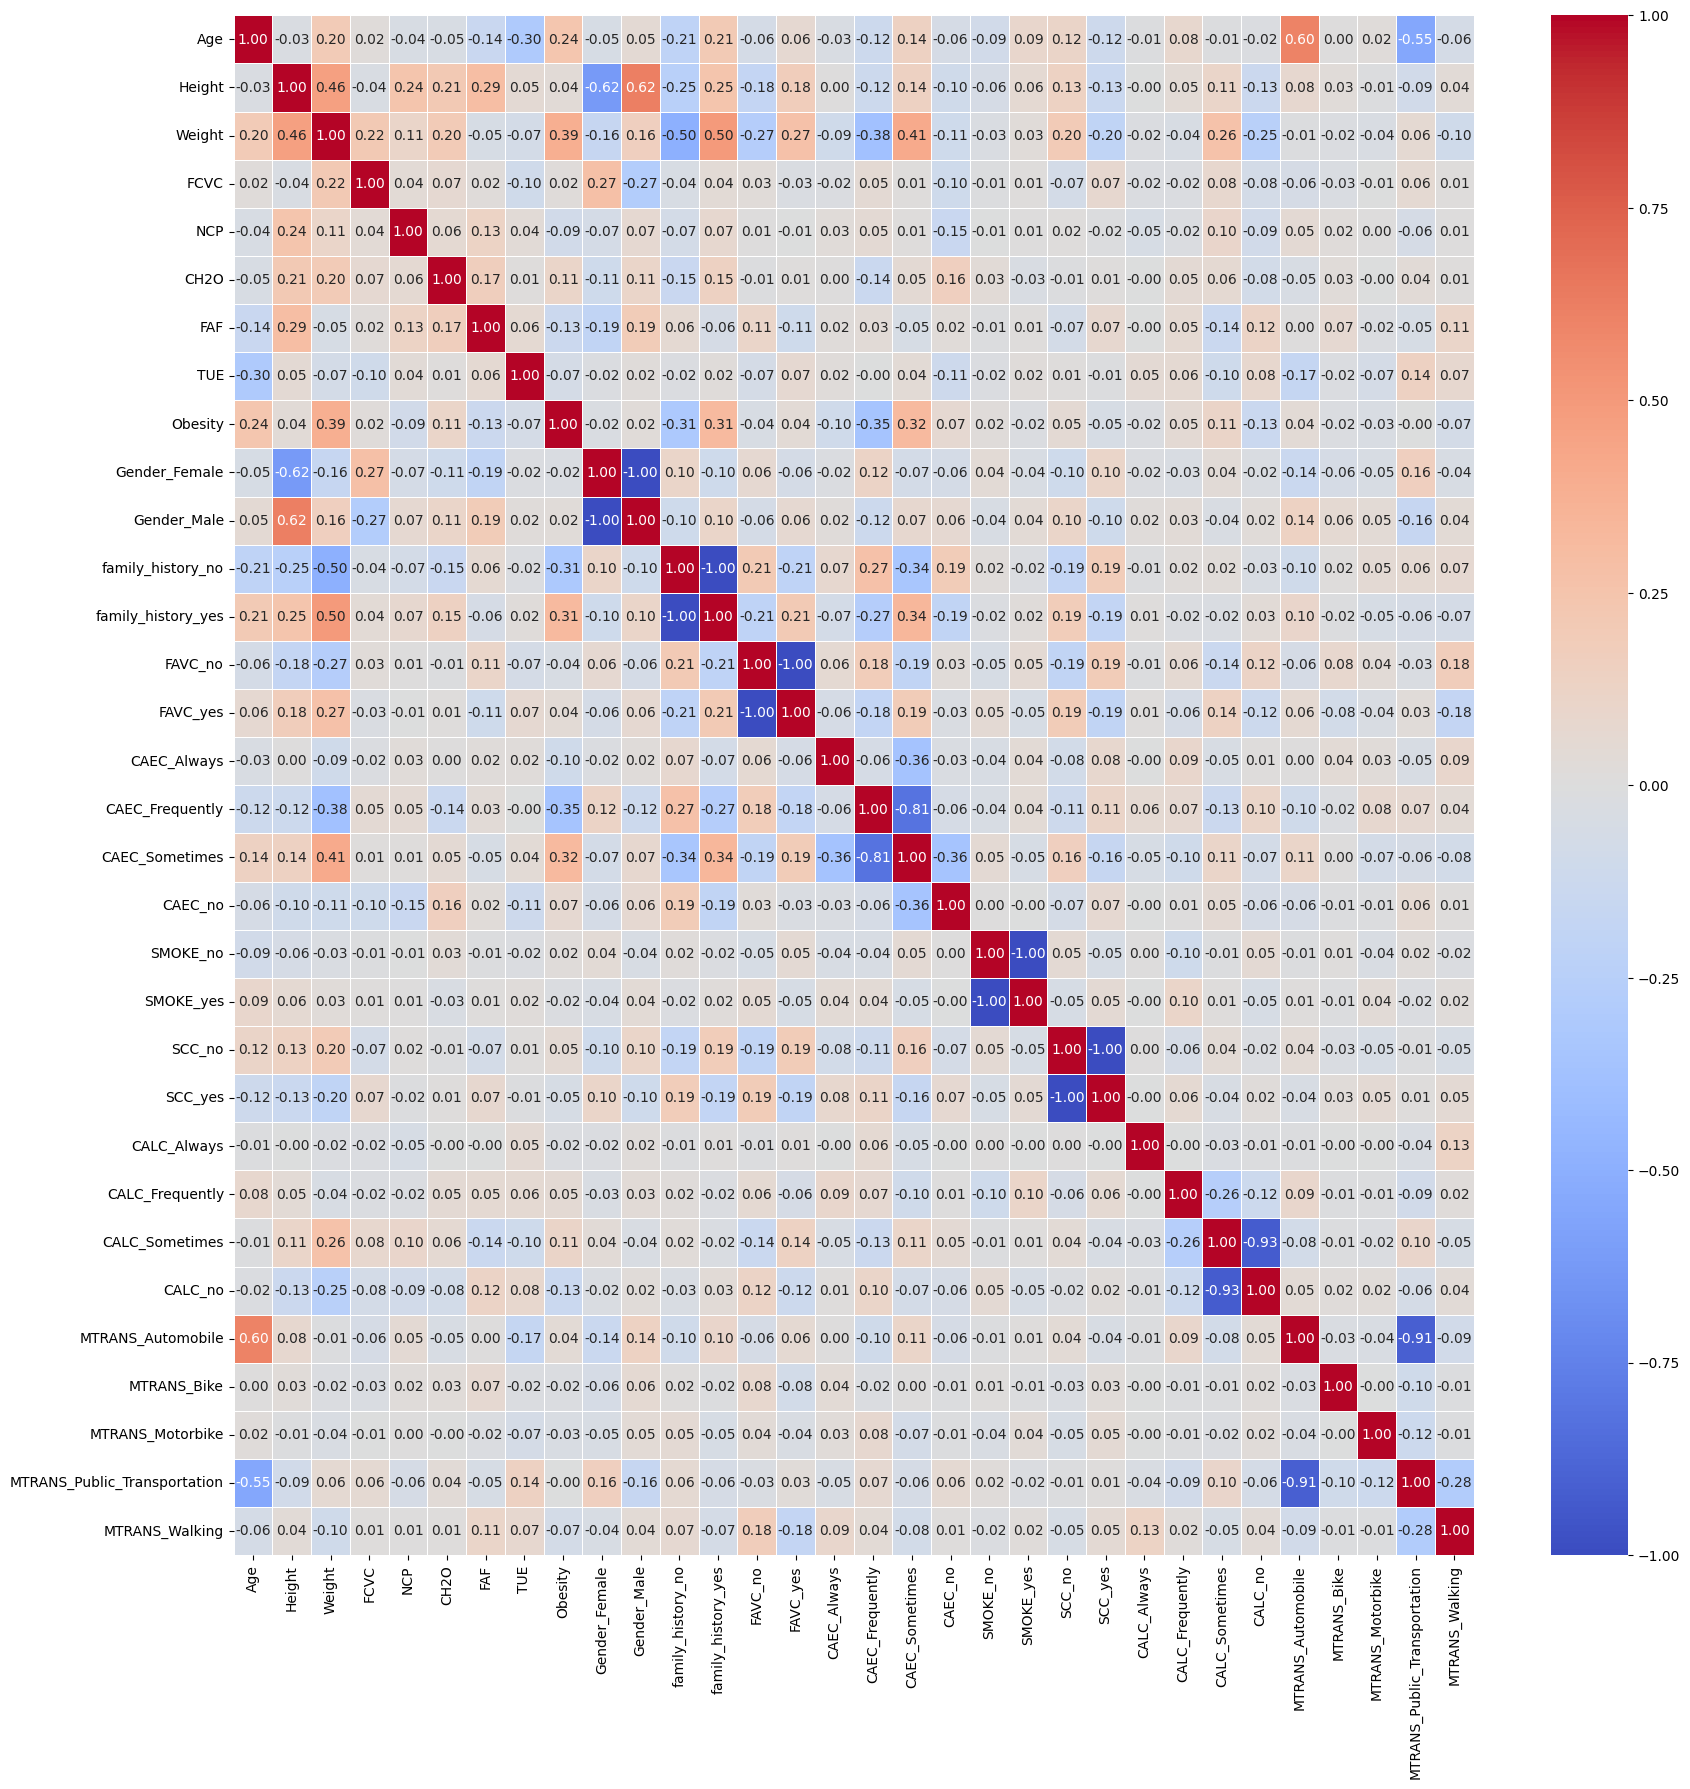

In [7]:
correlation=df.corr()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.show()

In [8]:
columns=["Age","Weight","family_history_yes","family_history_no","CAEC_Frequently","CAEC_Sometimes"]
X=df[columns]
y=df["Obesity"]

In [9]:
pickle.dump(columns,open("SelectedColumns.pkl","wb"))

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
model=LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)

c:\Users\testr\Documents\Projects\Obesity App\venv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
print("LOGISTIC REGRESSION:")
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Precision
print("Precision_Score (macro):", precision_score(y_test, y_pred, average="macro"))
print("Precision_Score (weighted):", precision_score(y_test, y_pred, average="weighted"))

# Recall
print("Recall_Score (macro):", recall_score(y_test, y_pred, average="macro"))
print("Recall_Score (weighted):", recall_score(y_test, y_pred, average="weighted"))

# Accuracy
print("Accuracy_Score:", accuracy_score(y_test, y_pred))


LOGISTIC REGRESSION:
Precision_Score (macro): 0.3781335906321999
Precision_Score (weighted): 0.3792116697979361
Recall_Score (macro): 0.3863387813697682
Recall_Score (weighted): 0.39243498817966904
Accuracy_Score: 0.39243498817966904


# Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)

In [14]:
pickle.dump(RF,open("RandomForestModel.pkl","wb"))

In [15]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Precision
print("Precision_Score (macro):", precision_score(y_test, y_pred, average="macro"))
print("Precision_Score (weighted):", precision_score(y_test, y_pred, average="weighted"))

# Recall
print("Recall_Score (macro):", recall_score(y_test, y_pred, average="macro"))
print("Recall_Score (weighted):", recall_score(y_test, y_pred, average="weighted"))

# Accuracy
print("Accuracy_Score:", accuracy_score(y_test, y_pred))


Precision_Score (macro): 0.8357574857900149
Precision_Score (weighted): 0.8403520672103713
Recall_Score (macro): 0.8413876980586024
Recall_Score (weighted): 0.8416075650118203
Accuracy_Score: 0.8416075650118203


# Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
Tree=DecisionTreeClassifier()
Tree.fit(X_train,y_train)
y_pred=Tree.predict(X_test)

In [17]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Precision
print("Precision_Score (macro):", precision_score(y_test, y_pred, average="macro"))
print("Precision_Score (weighted):", precision_score(y_test, y_pred, average="weighted"))

# Recall
print("Recall_Score (macro):", recall_score(y_test, y_pred, average="macro"))
print("Recall_Score (weighted):", recall_score(y_test, y_pred, average="weighted"))

# Accuracy
print("Accuracy_Score:", accuracy_score(y_test, y_pred))


Precision_Score (macro): 0.7899891482353018
Precision_Score (weighted): 0.7945635611633651
Recall_Score (macro): 0.7916173531960915
Recall_Score (weighted): 0.7943262411347518
Accuracy_Score: 0.7943262411347518


# Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB
NB=GaussianNB()
NB.fit(X_train,y_train)
y_pred=NB.predict(X_test)

In [19]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Precision
print("Precision_Score (macro):", precision_score(y_test, y_pred, average="macro"))
print("Precision_Score (weighted):", precision_score(y_test, y_pred, average="weighted"))

# Recall
print("Recall_Score (macro):", recall_score(y_test, y_pred, average="macro"))
print("Recall_Score (weighted):", recall_score(y_test, y_pred, average="weighted"))

# Accuracy
print("Accuracy_Score:", accuracy_score(y_test, y_pred))


Precision_Score (macro): 0.45087477563087314
Precision_Score (weighted): 0.4655841060667215
Recall_Score (macro): 0.3562500254658208
Recall_Score (weighted): 0.35933806146572106
Accuracy_Score: 0.35933806146572106


# K-Nearest Neighbors

In [20]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)
y_pred=KNN.predict(X_test)

In [21]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Precision
print("Precision_Score (macro):", precision_score(y_test, y_pred, average="macro"))
print("Precision_Score (weighted):", precision_score(y_test, y_pred, average="weighted"))

# Recall
print("Recall_Score (macro):", recall_score(y_test, y_pred, average="macro"))
print("Recall_Score (weighted):", recall_score(y_test, y_pred, average="weighted"))

# Accuracy
print("Accuracy_Score:", accuracy_score(y_test, y_pred))


Precision_Score (macro): 0.8232747602088868
Precision_Score (weighted): 0.8234810822633096
Recall_Score (macro): 0.8181494613760624
Recall_Score (weighted): 0.8226950354609929
Accuracy_Score: 0.8226950354609929
